In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import polyfit
import pandas as pd
from astropy.io import fits
from matplotlib_venn import venn3, venn3_circles
import matplotlib.lines as lines
from astropy import constants as const
from astropy.io import fits
import astropy.coordinates as coord
import astropy.units as u
from astropy.table import Table
# import ephem
from astropy.cosmology import FlatLambdaCDM

In [2]:
#---------------------------------------------------------
#Constants, taken from mass_SFR.py done by former students
#---------------------------------------------------------
Mag_sun_w1 = 3.254
Mag_sun_error_w1 = np.sqrt(0.008**2+0.02**2) #extra 0!!
Mag_sun_kt = 3.302
Mag_sun_error_kt = np.sqrt(0.008**2+0.02**2)
lum_sun = 3.828e26 #in W from NASA fact sheet
c = const.c.to('km/s').value #c in km/s
nu_3 = (c*1000)/(11.5608e-6) #in s^-1 from Table 1 in Jarrett et al. (2011) (link: http://iopscience.iop.org/article/10.1088/0004-637X/735/2/112/pdf)
zp_3 = 31.674 #in Jy Table 1 this WISE guide: http://wise2.ipac.caltech.edu/docs/release/allsky/expsup/sec4_4h.html#example
a_3 = [1.13, 10.24] #Cluver14
a_4 = [0.82, 7.3] #Cluver14
h0 = 73.8 #h0 in km/(Mpc*s) Riess2011
h0_error = 2.4 # km/(Mpc*s)
parsec = 3.08567758e16 #m
jansky = 1e-26 #W/m^2/Hz
cosmo = FlatLambdaCDM(h0, Om0=0.262) # Shawn: to match cosmology used by Becky

In [13]:
spec_with_mass = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/spec_with_mass.csv')
spec_121519 = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/spec_121519.csv')

In [4]:
spec_with_mass# = spec_with_mass.drop(columns = ['Unnamed: 0'])
#spec_121519# = spec_121519.drop(columns = ['Unnamed: 0'])

,Unnamed: 0,RA,DEC,z1,z2,spec_type,GAMA_ID,STELLAR_MASS,max_total_mass,theta_e,Z,max_stellar_mass_salpeter,max_stellar_mass_chabrier
0,0,138.28150,-0.66673,0.163,0.321,PG+ELG,198082,3.025000e+10,1.655791e+11,0.514681,0.1632,1.142496e+11,6.457585e+10
1,1,129.69546,-0.38179,0.418,0.738,PG+ELG,202448,NaN,4.820062e+11,NaN,NaN,3.325843e+11,1.879824e+11
2,2,136.63883,-0.35203,0.282,0.449,PG+ELG,204140,8.578000e+10,3.790958e+11,0.572792,0.2818,2.615761e+11,1.478474e+11
3,3,132.36771,0.16360,0.128,0.603,PG+ELG,209222,1.425000e+10,8.124632e+10,0.504294,0.1277,5.605996e+10,3.168606e+10
4,4,132.61013,0.11972,0.313,0.608,PG+ELG,209295,8.456000e+10,3.225492e+11,0.616542,0.3126,2.225589e+11,1.257942e+11
5,5,134.02979,0.15244,0.167,0.158,PG+ELG,209584,NaN,-1.465889e+12,NaN,NaN,-1.011463e+12,-5.716967e+11
6,6,140.14187,0.97341,0.586,0.336,PG+ELG,279956,NaN,-3.937920e+11,NaN,NaN,-2.717165e+11,-1.535789e+11
7,7,135.32929,1.22984,0.487,0.247,PG+ELG,301818,1.215000e+11,-2.506021e+11,NaN,0.4862,-1.729154e+11,-9.773481e+10
8,8,138.94058,1.33144,0.593,0.404,PG+ELG,302719,1.474000e+11,-6.337884e+11,NaN,0.5933,-4.373140e+11,-2.471775e+11
9,9,130.73717,1.55957,0.416,0.350,PG+ELG,323200,1.216000e+11,-1.103030e+12,NaN,0.4158,-7.610909e+11,-4.301818e+11


In [ ]:
# maximum mass if theta_e is 1 arcsec (aperture diameter is 2 arcsec,
# Ho = 73.8 km/(Mpc*s), c = 3*10**8 m/s
# as a function of source (z2)
#  and lens (z1) redshift
z1 = spec_with_mass.z1
z2 = spec_with_mass.z2

# max_mass = (z1*z2/z2-z1)*(c/Ho Gpc)*(theta_e/arcsec)**2(5*10**11 M_solar)

max_mass = (z1*z2)*(5*10**11)/(z2-z1)

In [ ]:
# Assuming FDM 0.31 from Barnabe-2011 (v close to Auger 2009 and Oguri 2014) (Sonnenfield 2015 said 0.25)
# Salpeter IMF, Max stellar mass is 0.69*max_total_mass
spec_with_mass['max_stellar_mass'] = 0.69*spec_with_mass.max_total_mass

In [ ]:
# Assuming FDM 0.61 from Barnabe-2011 
# Chabrier IMF, Max stellar mass is 0.39*max_total_mass
spec_with_mass['max_stellar_mass_chabrier'] = 0.39*spec_with_mass.max_total_mass

In [ ]:
spec_with_mass #= spec_with_mass[['Unnamed: 0', 'RA', 'DEC', 'z1', 'z2', 'spec_type', 'GAMA_ID',
       #'STELLAR_MASS', 'max_mass', 'theta_e', 'Z']]

In [ ]:
spec_with_mass# = spec_with_mass.rename(columns = {'max_stellar_mass':'max_stellar_mass_salpeter'})

In [ ]:
#spec_with_mass.to_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/spec_with_mass.csv')

In [ ]:
spec_with_mass[spec_with_mass.max_stellar_mass_chabrier <= spec_with_mass.STELLAR_MASS]

# For full spec catalog and for spec_121519:
## Salpeter IMF  (FDM = 0.31) 
### The max stellar mass is 0.69 times the max total mass. 
### The stellar mass for each candidate is still smaller than the max stellar mass.
## Chabrier IMF (FDM = 0.61)
### The max stellar mass is 0.39 times the max total mass.
### The stellar mass excedes the total stellar mass for two candidates.
# I'm going with Salpeter because Sonnenfield 2012, Grillo 2009, Treu 2010, Auger 2010 all find that a Salpeter IMF better matches the measurements of stellar massesfrom lensing and dynamics
# UPDATE 12/22/19 I'm going with CHABRIER because MagPhys did that. Dammit.

In [14]:
spec_121519

,Unnamed: 0,Unnamed: 0.1,RA,DEC,z1,z2,spec_type,GAMA_ID,STELLAR_MASS,theta_e,z_ratio,max_total_mass,max_stellar_mass_salpeter,max_stellar_mass_chabrier,theta_e_chabrier
0,0,0,138.28150,-0.66673,0.163,0.321,PG+ELG,198082,3.025000e+10,0.514681,1.969325,1.655791e+11,1.142496e+11,6.457585e+10,0.684590
1,1,1,129.69546,-0.38179,0.418,0.738,PG+ELG,202448,NaN,NaN,1.765550,4.820062e+11,3.325843e+11,1.879824e+11,NaN
2,2,2,136.63883,-0.35203,0.282,0.449,PG+ELG,204140,8.578000e+10,0.572792,1.592199,3.790958e+11,2.615761e+11,1.478474e+11,0.761884
3,3,3,132.61013,0.11972,0.313,0.608,PG+ELG,209295,8.456000e+10,0.616542,1.942492,3.225492e+11,2.225589e+11,1.257942e+11,0.820078
4,4,4,137.90642,1.62916,0.169,0.334,PG+ELG,377486,NaN,NaN,1.976331,1.710485e+11,1.180235e+11,6.670891e+10,NaN
5,5,5,138.99892,2.51429,0.167,0.299,PG+ELG,388201,3.647000e+10,0.528755,1.790419,1.891402e+11,1.305067e+11,7.376466e+10,0.703310
6,6,6,129.41362,-0.01039,0.274,0.657,PG+ELG,573657,NaN,NaN,2.397810,2.350104e+11,1.621572e+11,9.165407e+10,NaN
7,7,7,176.29229,0.73915,0.529,0.642,PG+ELG,7242,NaN,NaN,1.213611,1.502735e+12,1.036887e+12,5.860665e+11,NaN
8,8,8,177.78321,0.91949,0.400,0.569,PG+ELG,98399,NaN,NaN,1.422500,6.733728e+11,4.646272e+11,2.626154e+11,NaN
9,9,9,176.05287,-1.77459,0.264,0.589,PG+ELG,136800,8.662000e+10,0.724577,2.231061,2.392246e+11,1.650650e+11,9.329760e+10,0.963777


In [ ]:
# maximum mass if theta_e is 1 arcsec (aperture = 2 arcsec),
# Ho = 73.8 km/(Mpc*s), c = 3*10^5 km/s
# as a function of source (z2)
#  and lens (z1) redshift
z1 = spec_121519.z1
z2 = spec_121519.z2

# max_mass = (DS*DL/DS-DL)(theta_e/arcsec)^2*(10^11.09 M_solar)
# (DS*DL/DS-DL) = C/Ho*Gpc(z1*z2/z2-z1)
#(c/Ho Gpc) = 4.07
# max_mass = (z1*z2/z2-z1)*(theta_e/arcsec)^2(5*10^11 M_solar)

max_mass = (z1*z2)*(5*10**11)/(z2-z1)

#spec_121519['max_mass'] = max_mass

In [ ]:
# Max stellar mass is 0.69*max_total_mass
#spec_121519['max_stellar_mass'] = 0.69*spec_121519.max_total_mass

In [ ]:
# Assuming FDM 0.61 from Barnabe-2011 Chabrier IMF, Max stellar mass is 0.39*max_total_mass
#spec_121519['max_stellar_mass_chabrier'] = 0.39*spec_121519.max_total_mass

In [ ]:
#spec_121519.to_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/spec_121519.csv')

In [15]:
mac_121519 = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_121519.csv')
zoo_121519 = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_121519.csv')

/home/shawn/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(0.0, 0.75)

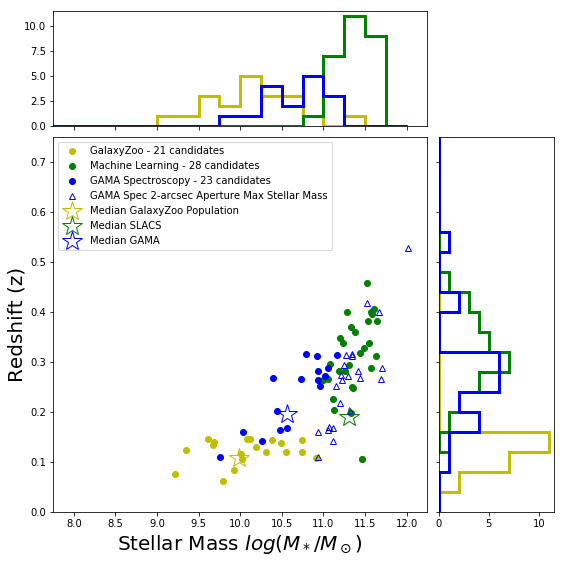

In [16]:
# Three-panel plot
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
lower, height = 0.1, 0.65
lower_h = left_h = left+width+0.02
    
rect_scatter = [left, lower, width, height]
rect_histx = [left, lower_h, width, 0.2]
rect_histy = [left_h, lower, 0.2, height]
    
    # start with a rectangular Figure
plt.figure(1, figsize=(8,8))
    
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
    
    # no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plots
axScatter.set_xlim((min(np.log10(zoo_121519.STELLAR_MASS))-0.5, max(np.log10(mac_121519.STELLAR_MASS))+0.5))
axScatter.set_ylim((min(mac_121519.Z)-0.05, max(mac_121519.Z)+0.05))
axScatter.plot(np.log10(zoo_121519.STELLAR_MASS), zoo_121519.Z, 'yo',label='GalaxyZoo - 20 candidates')
axScatter.plot(np.log10(mac_121519.STELLAR_MASS), mac_121519.Z, 'go',label='Machine Learning - 28 candidates')
axScatter.plot(np.log10(spec_121519.STELLAR_MASS), spec_121519.z1, 'bo',label='GAMA Spectroscopy - 23 candidates')
#axScatter.plot(np.log10(spec_121519.max_total_mass), spec_121519.z1, 'b.',label='GAMA Spec 2-arcsec Aperture Max Total Mass', fillstyle='none')
axScatter.plot(np.log10(spec_121519.max_stellar_mass_salpeter), spec_121519.z1, 'b^',label='GAMA Spec 2-arcsec Aperture Max Stellar Mass', fillstyle='none')
axScatter.plot(np.log10(9.662e+09),0.1076, 'y*',label='Median GalaxyZoo Population', ms=20, fillstyle = 'none')
axScatter.plot(np.log10(2.00e+11),0.19, 'g*',label='Median SLACS', ms = 20, fillstyle = 'none')
axScatter.plot(np.log10(3.6425e+10), 0.1968, 'b*',label='Median GAMA', ms = 20, fillstyle = 'none')
axScatter.legend(loc='upper left', numpoints=1, fontsize = 10)
    
    
# now determine nice limits by hand:
binwidth = 0.5
bins=20
#xbins = np.arange(min(zoo_hard_cut.STELLAR_MASS),max(zoo_hard_cut.STELLAR_MASS), (max(zoo_hard_cut.STELLAR_MASS)-min(zoo_hard_cut.STELLAR_MASS))/bins)
#ybins = np.arange(min(zoo_hard_cut.Z),max(zoo_hard_cut.Z), (max(zoo_hard_cut.Z)-min(zoo_hard_cut.Z))/bins)

axScatter.set_xlim((min(zoo_121519.STELLAR_MASS)-0.5, max(zoo_121519.STELLAR_MASS)+0.5))
axScatter.set_ylim((min(zoo_121519.Z)-0.05, max(zoo_121519.Z)+0.05))
axScatter.axis([7.75,12.25,0.,0.75], prop={'size':25})

axScatter.set_xlabel(r'Stellar Mass $log(M_*/M_\odot)$', fontsize=20)
axScatter.set_ylabel(r'Redshift (z)', fontsize=20)
    
#xbins = np.arange(8.5, 12.5, xbinwidth)
#ybins = np.arange(0., 0.6, ybinwidth)
    
axHisty.hist(zoo_121519.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='y', histtype = 'step', linewidth=3)
axHisty.hist(mac_121519.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='g', histtype = 'step', linewidth=3)
axHisty.hist(spec_121519.z1, orientation='horizontal', range=[0,0.8],  bins=bins,color='b',  histtype = 'step', linewidth=3)
    
axHistx.hist(np.log10(zoo_121519.STELLAR_MASS), range=[7,12], bins=bins,color='y', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(mac_121519.STELLAR_MASS), range=[7,12], bins=bins,color='g', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(spec_121519.STELLAR_MASS), range=[7,12], bins=bins,color='b', histtype = 'step', linewidth=3)
    
axHistx.set_xlim( axScatter.get_xlim() )
axHisty.set_ylim( axScatter.get_ylim() )

#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/121519_all_methods_medians_maxmasses.pdf')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/121519_all_methods_medians_maxmasses.png')

# Let's put in the few from the other surveys.

In [3]:
# Read in the three that had MagPhys Matches
decals = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/decals_in_gama.csv')
s4tm = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/s4tm_gama.csv')
slacs = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/slacs_gama.csv')

In [4]:
# Opening GAMA MagPhys data from G09, G12, and G15 (DR3)
hdul = fits.open('/home/shawn/Desktop/gravitational_lensing_research/FITS_Files/MagPhys.fits')  # open a FITS file
hdul.verify('fix')
magphys = hdul[1].data  # assume the first extension is a table
print(magphys.columns)

ColDefs(
    name = 'CATAID'; format = 'J'; null = -2147483648
    name = 'Z'; format = 'E'
    name = 'f_mu_SFH_best_fit'; format = 'E'
    name = 'f_mu_SFH_percentile2_5'; format = 'E'
    name = 'f_mu_SFH_percentile16'; format = 'E'
    name = 'f_mu_SFH_percentile50'; format = 'E'
    name = 'f_mu_SFH_percentile84'; format = 'E'
    name = 'f_mu_SFH_percentile97_5'; format = 'E'
    name = 'f_mu_IR_best_fit'; format = 'E'
    name = 'f_mu_IR_percentile2_5'; format = 'E'
    name = 'f_mu_IR_percentile16'; format = 'E'
    name = 'f_mu_IR_percentile50'; format = 'E'
    name = 'f_mu_IR_percentile84'; format = 'E'
    name = 'f_mu_IR_percentile97_5'; format = 'E'
    name = 'mu_parameter_best_fit'; format = 'E'
    name = 'mu_parameter_percentile2_5'; format = 'E'
    name = 'mu_parameter_percentile16'; format = 'E'
    name = 'mu_parameter_percentile50'; format = 'E'
    name = 'mu_parameter_percentile84'; format = 'E'
    name = 'mu_parameter_percentile97_5'; format = 'E'
    name = 

In [5]:
gamaid = magphys.CATAID # Select wanted columns
mass = magphys.mass_stellar_best_fit
z = magphys.Z

gama_list = list(zip(gamaid,mass,z)) # zip to list

gama_mass = pd.DataFrame(gama_list, columns = ['GAMA_ID','STELLAR_MASS','Z']) # create DF

In [11]:
decals_gama = pd.merge(decals, gama_mass, how = 'left', on = 'GAMA_ID')

In [12]:
decals_gama

,Unnamed: 0,DESI_ID,GAMA_ID,Rank,RA_x,DEC_x,RA_y,DEC_y,Type,mag g,mag r,mag z,Probability,z,Survey,Unnamed: 0.1,STELLAR_MASS,Z
0,0,DESI-215.2654+00.3719,NaN,A,215.2654,0.3719,NaN,NaN,DEV,21.32,20.05,18.730,0.974,NaN,NaN,51,NaN,NaN
1,1,DESI-131.3607+00.0361,NaN,B,131.3607,0.0361,NaN,NaN,DEV,24.15,21.79,19.700,0.800,NaN,NaN,68,NaN,NaN
2,2,DESI-219.0374-01.3295,493010.0,B,219.0374,-1.3295,219.03739,-1.32946,DEV,20.10,18.66,17.600,0.847,NaN,NaN,98,5.262000e+11,0.5239
3,3,DESI-219.9228+00.5073,93310.0,B,219.9228,0.5073,219.92276,0.50731,DEV,18.67,17.67,17.000,0.837,0.1377,SDSS,99,3.094000e+10,0.1377
4,4,DESI-138.6664-00.0821,NaN,C,138.6664,-0.0821,NaN,NaN,22.79,21.03,19.69,0.953,NaN,NaN,NaN,122,NaN,NaN
5,5,DESI-180.0490-00.4182,NaN,C,180.0490,-0.4182,NaN,NaN,COMP,23.41,21.54,19.960,0.971,NaN,NaN,138,NaN,NaN


In [13]:
s4tm_gama = pd.merge(s4tm, gama_mass, how = 'left', on = 'GAMA_ID')
s4tm_gama

,Unnamed: 0,Target,GAMA_ID,RA,DEC_x,plate,mjd,fiberid,Plate-MJD-Fiber,z L,...,σSDSS (km s −1),I 814 (mag),ΔI 814 (mag),Reff (arcsec),q,P.A. (deg),Classification,DEC_y,STELLAR_MASS,Z
0,0,SDSSJ1422+0203,250704,215.57813,2.054526,534,51997,481,0534-51997-481,0.1104,...,172±9,16.39,0.07,2.05,0.72,175.0,E-S-C,2.05453,1.128000e+11,0.1104


In [14]:
slacs_gama = pd.merge(slacs, gama_mass, how = 'left', on = 'GAMA_ID')
slacs_gama

,Unnamed: 0,SDSS_ID,z lens,z src,GAMA_ID,RA,DEC,STELLAR_MASS,Z
0,0,SDSSJ0912+0029,0.164,0.324,216398.0,138.02213,0.48366,4.438000e+11,0.1642
1,1,SDSSJ1143−0144,0.106,0.402,136604.0,175.87349,-1.74167,2.866000e+11,0.1060
2,2,SDSSJ1436−0000,0.285,0.805,NaN,NaN,NaN,NaN,NaN
3,3,SDSSJ1451−0239,0.125,0.520,NaN,NaN,NaN,NaN,NaN


In [16]:
decals_gama.to_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/decals_gama.csv')
s4tm_gama.to_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/s4tm_gama.csv')
slacs_gama.to_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/slacs_gama.csv')

(0.0, 0.75)

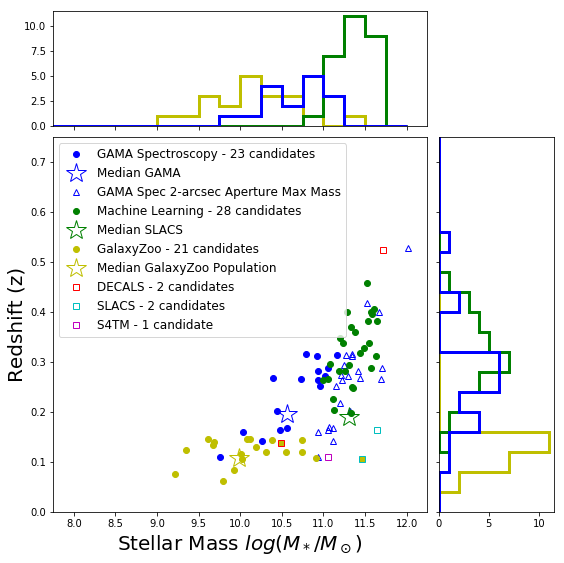

In [28]:
# Three-panel plot
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
lower, height = 0.1, 0.65
lower_h = left_h = left+width+0.02
    
rect_scatter = [left, lower, width, height]
rect_histx = [left, lower_h, width, 0.2]
rect_histy = [left_h, lower, 0.2, height]
    
    # start with a rectangular Figure
plt.figure(1, figsize=(8,8))
    
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
    
    # no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plots
axScatter.set_xlim((min(np.log10(zoo_121519.STELLAR_MASS))-0.5, max(np.log10(mac_121519.STELLAR_MASS))+0.5))
axScatter.set_ylim((min(mac_121519.Z)-0.05, max(mac_121519.Z)+0.05))
axScatter.plot(np.log10(spec_121519.STELLAR_MASS), spec_121519.z1, 'bo',label='GAMA Spectroscopy - 23 candidates')
axScatter.plot(np.log10(3.6425e+10), 0.1968, 'b*',label='Median GAMA', ms = 20, fillstyle = 'none')
axScatter.plot(np.log10(spec_121519.max_stellar_mass_salpeter), spec_121519.z1, 'b^',label='GAMA Spec 2-arcsec Aperture Max Mass', fillstyle='none')
axScatter.plot(np.log10(mac_121519.STELLAR_MASS), mac_121519.Z, 'go',label='Machine Learning - 28 candidates')
axScatter.plot(np.log10(2.00e+11),0.19, 'g*',label='Median SLACS', ms = 20, fillstyle = 'none')
axScatter.plot(np.log10(zoo_121519.STELLAR_MASS), zoo_121519.Z, 'yo',label='GalaxyZoo - 21 candidates')
axScatter.plot(np.log10(9.662e+09),0.1076, 'y*',label='Median GalaxyZoo Population', ms=20, fillstyle = 'none')
axScatter.plot(np.log10(decals_gama.STELLAR_MASS), decals_gama.Z, 'rs',label='DECALS - 2 candidates', fillstyle = 'none')
axScatter.plot(np.log10(slacs_gama.STELLAR_MASS), slacs_gama.Z, 'cs',label='SLACS - 2 candidates', fillstyle = 'none')
axScatter.plot(np.log10(s4tm_gama.STELLAR_MASS), s4tm_gama.Z, 'ms',label='S4TM - 1 candidate', fillstyle = 'none')


axScatter.legend(loc='upper left', numpoints=1, fontsize = 12)
    
    
# now determine nice limits by hand:
binwidth = 0.5
bins=20
#xbins = np.arange(min(zoo_hard_cut.STELLAR_MASS),max(zoo_hard_cut.STELLAR_MASS), (max(zoo_hard_cut.STELLAR_MASS)-min(zoo_hard_cut.STELLAR_MASS))/bins)
#ybins = np.arange(min(zoo_hard_cut.Z),max(zoo_hard_cut.Z), (max(zoo_hard_cut.Z)-min(zoo_hard_cut.Z))/bins)

axScatter.set_xlim((min(zoo_121519.STELLAR_MASS)-0.5, max(zoo_121519.STELLAR_MASS)+0.5))
axScatter.set_ylim((min(zoo_121519.Z)-0.05, max(zoo_121519.Z)+0.05))
axScatter.axis([7.75,12.25,0.,0.75], prop={'size':25})

axScatter.set_xlabel(r'Stellar Mass $log(M_*/M_\odot)$', fontsize=20)
axScatter.set_ylabel(r'Redshift (z)', fontsize=20)
    
#xbins = np.arange(8.5, 12.5, xbinwidth)
#ybins = np.arange(0., 0.6, ybinwidth)
    
axHisty.hist(zoo_121519.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='y', histtype = 'step', linewidth=3)
axHisty.hist(mac_121519.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='g', histtype = 'step', linewidth=3)
axHisty.hist(spec_121519.z1, orientation='horizontal', range=[0,0.8],  bins=bins,color='b',  histtype = 'step', linewidth=3)
    
axHistx.hist(np.log10(zoo_121519.STELLAR_MASS), range=[7,12], bins=bins,color='y', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(mac_121519.STELLAR_MASS), range=[7,12], bins=bins,color='g', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(spec_121519.STELLAR_MASS), range=[7,12], bins=bins,color='b', histtype = 'step', linewidth=3)
    
axHistx.set_xlim( axScatter.get_xlim() )
axHisty.set_ylim( axScatter.get_ylim() )

#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/121519_all_methods_medians_maxmasses_additional_surveys.pdf')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/121519_all_methods_medians_maxmasses_additional_surveys.png')

In [ ]:
zoo_121519[np.log10(zoo_121519.STELLAR_MASS) <= 8.5]
# this guy isn't too convincing... might want to remove him.

In [ ]:
decals

# 12/22/19 Redoing the plot with my own calculations

In [30]:
slacs_survey = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/slacs.csv')
zoo_survey = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_with_mass.csv')
gama_survey = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/gama_id_mass_z.csv')

In [31]:
gama_survey.columns

Index(['Unnamed: 0', 'GAMA_ID', 'MASS', 'Z'], dtype='object')

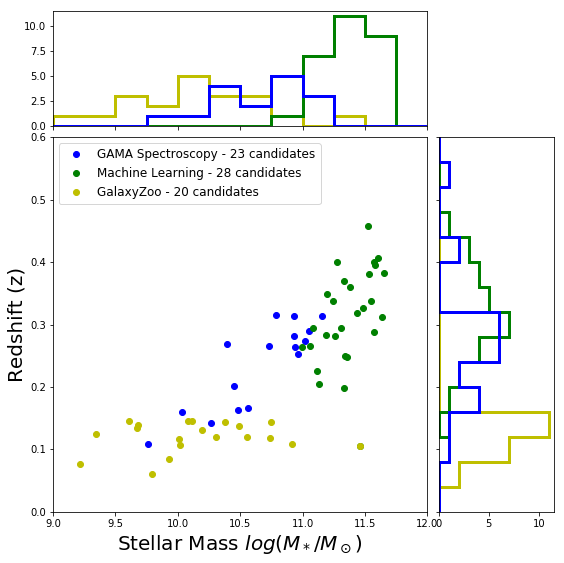

In [75]:
# Three-panel plot
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
lower, height = 0.1, 0.65
lower_h = left_h = left+width+0.02
    
rect_scatter = [left, lower, width, height]
rect_histx = [left, lower_h, width, 0.2]
rect_histy = [left_h, lower, 0.2, height]
    
    # start with a rectangular Figure
plt.figure(1, figsize=(8,8))
    
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
    
    # no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plots
axScatter.set_xlim((min(np.log10(zoo_121519.STELLAR_MASS))-0.5, max(np.log10(mac_121519.STELLAR_MASS))+0.5))
axScatter.set_ylim((min(mac_121519.Z)-0.05, max(mac_121519.Z)+0.05))
axScatter.plot(np.log10(spec_121519.STELLAR_MASS), spec_121519.z1, 'bo',label='GAMA Spectroscopy - 23 candidates')
#axScatter.plot(np.log10(gama_survey.MASS.median()), gama_survey.Z.median(), 'b*',label='GAMA DR3 Median', ms = 15, fillstyle = 'left')
#axScatter.plot(np.log10(gama_survey.MASS.mean()),gama_survey.Z.mean(), 'b*',label='GAMA DR3 Mean', ms = 15, fillstyle = 'right')
#axScatter.plot(np.log10(spec_121519.max_stellar_mass_chabrier), spec_121519.z1, 'b^',label='GAMA Spec 2-arcsec Aperture Max Mass', fillstyle='none')
axScatter.plot(np.log10(mac_121519.STELLAR_MASS), mac_121519.Z, 'go',label='Machine Learning - 28 candidates')
#axScatter.plot(np.log10(slacs_survey.stellar_mass_chabrier.median()),slacs_survey.zlens.median(), 'g*',label='SLACS Median', ms = 15, fillstyle = 'left')
#axScatter.plot(np.log10(slacs_survey.stellar_mass_chabrier.mean()),slacs_survey.zlens.mean(), 'g*',label='SLACS Mean', ms = 15, fillstyle = 'right')
axScatter.plot(np.log10(zoo_121519.STELLAR_MASS), zoo_121519.Z, 'yo',label='GalaxyZoo - 20 candidates')
#axScatter.plot(np.log10(zoo_survey.STELLAR_MASS.median()),zoo_survey.Z.median(), 'y*',label='GalaxyZoo Population Median', ms=15, fillstyle = 'left')
#axScatter.plot(np.log10(zoo_survey.STELLAR_MASS.mean()),zoo_survey.Z.mean(), 'y*',label='GalaxyZoo Population Mean', ms = 15, fillstyle = 'right')
#axScatter.plot(np.log10(decals_gama.STELLAR_MASS), decals_gama.Z, 'ms',label='DECALS - 2 candidates', fillstyle = 'none')
#axScatter.plot(np.log10(slacs_gama.STELLAR_MASS), slacs_gama.Z, 'rs',label='SLACS - 2 candidates', fillstyle = 'none')
#axScatter.plot(np.log10(s4tm_gama.STELLAR_MASS), s4tm_gama.Z, 'cs',label='S4TM - 1 candidate', fillstyle = 'none')

#axScatter.errorbar(np.log10(spec_121519.STELLAR_MASS), spec_121519.z1,xerr=np.log10(spec_121519.max_stellar_mass_chabrier)-np.log10(spec_121519.STELLAR_MASS),yerr=np.zeros(len(spec_121519)),xlolims=True, fmt = 'bo',elinewidth=1,alpha=0.4, label = 'GAMA Maximum Stellar Mass')#, fillstyle='none')


axScatter.legend(loc='upper left', numpoints=1, fontsize = 12)
    
    
# now determine nice limits by hand:
binwidth = 0.5
bins=20
#xbins = np.arange(min(zoo_hard_cut.STELLAR_MASS),max(zoo_hard_cut.STELLAR_MASS), (max(zoo_hard_cut.STELLAR_MASS)-min(zoo_hard_cut.STELLAR_MASS))/bins)
#ybins = np.arange(min(zoo_hard_cut.Z),max(zoo_hard_cut.Z), (max(zoo_hard_cut.Z)-min(zoo_hard_cut.Z))/bins)

axScatter.set_xlim((min(zoo_121519.STELLAR_MASS)-0.5, max(zoo_121519.STELLAR_MASS)+0.5))
axScatter.set_ylim((min(zoo_121519.Z)-0.05, max(zoo_121519.Z)+0.05))
axScatter.axis([9.,12.,0.,0.6], prop={'size':25})

axScatter.set_xlabel(r'Stellar Mass $log(M_*/M_\odot)$', fontsize=20)
axScatter.set_ylabel(r'Redshift (z)', fontsize=20)
    
#xbins = np.arange(8.5, 12.5, xbinwidth)
#ybins = np.arange(0., 0.6, ybinwidth)
    
axHisty.hist(zoo_121519.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='y', histtype = 'step', linewidth=3)
axHisty.hist(mac_121519.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='g', histtype = 'step', linewidth=3)
axHisty.hist(spec_121519.z1, orientation='horizontal', range=[0,0.8],  bins=bins,color='b',  histtype = 'step', linewidth=3)
    
axHistx.hist(np.log10(zoo_121519.STELLAR_MASS), range=[7,12], bins=bins,color='y', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(mac_121519.STELLAR_MASS), range=[7,12], bins=bins,color='g', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(spec_121519.STELLAR_MASS), range=[7,12], bins=bins,color='b', histtype = 'step', linewidth=3)
    
axHistx.set_xlim( axScatter.get_xlim() )
axHisty.set_ylim( axScatter.get_ylim() )

#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/123019/PDFs/three_plot_external_surveys.pdf')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/123019/PDFs/three_plot_candidates.png')